In [233]:
%pylab inline --no-import-all
import seaborn as sns
import scipy as sp
from sklearn.neural_network import MLPClassifier

Populating the interactive namespace from numpy and matplotlib


ImportError: cannot import name 'MLPClassifier'

Downloading MNIST datased. I use just test samle of mnist dataset (as it's much smaller in size)

**P.S.: it takes about 2MB, so this can take some time**

In [57]:
import requests
import gzip
images_r = requests.get('http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz')
labels_r = requests.get('http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz')

with open("/tmp/images", "wb") as f:
    f.write(gzip.decompress(images_r.content))
with open("/tmp/labels", "wb") as f:
    f.write(gzip.decompress(labels_r.content))

In [58]:
import os, struct
from array import array

def read_mnist(digits, fname_img, fname_lbl):
    flbl = open(fname_lbl, 'rb')
    magic_nr, size = struct.unpack(">II", flbl.read(8))
    lbl = array("b", flbl.read())
    flbl.close()

    fimg = open(fname_img, 'rb')
    magic_nr, size, rows, cols = struct.unpack(">IIII", fimg.read(16))
    img = array("B", fimg.read())
    fimg.close()

    ind = [ k for k in range(size) if lbl[k] in digits ]
    images =  np.zeros((len(ind), rows*cols))
    labels = np.zeros((len(ind), 1))
    for i in range(len(ind)):
        images[i, :] = list(img[ ind[i]*rows*cols : (ind[i]+1)*rows*cols ])
        labels[i] = lbl[ind[i]]

    return images, labels

Read MNIST dataset and convert result to numpy arrays

In [232]:
images, labels = read_mnist(list(range(0, 10)), "/tmp/images", "/tmp/labels")
images = np.array(images)
labels = np.array(labels)

Let's try to clean our images by morphology and thresholding

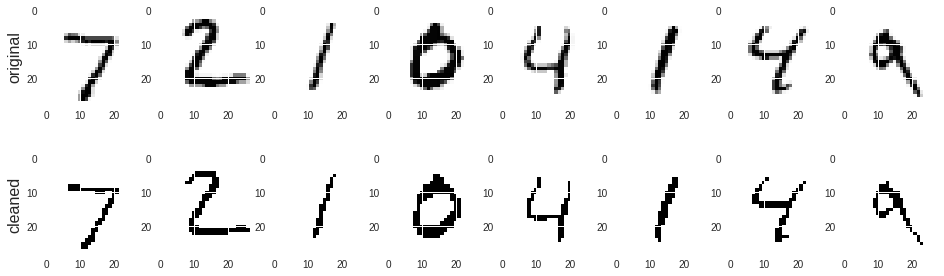

In [238]:
clean_images = np.apply_along_axis(lambda arr: sp.ndimage.grey_erosion(arr.reshape((28, 28)), size=(2,2)).reshape(28*28),
                           1, images)
threshold = 40
clean_images = np.where(clean_images > threshold, 1, 0)

examples = 8
fig, axes = plt.subplots(2, examples, figsize=(16, 5))
for col in range(examples):
    axes[0, col].imshow(images[col].reshape(28, 28))
    axes[1, col].imshow(clean_images[col].reshape(28, 28))
    
axes[0, 0].set_ylabel("original", size=16)
axes[1, 0].set_ylabel("cleaned", size=16)

Split data to train and test sets

In [231]:
trainX, testX = np.split(clean_images, [9000])
trainY, testY = np.split(labels, [9000])

Create multilayer perceptron classifier

In [225]:
clf = MLPClassifier(hidden_layer_sizes=(100, 50, 10)) # 3 hidden layers with 100, 50 and 10 neurons respectively

NameError: name 'MLPClassifier' is not defined

Train the classifier

In [226]:
clf.fit(trainX, trainY.reshape(trainY.shape[0]))

NameError: name 'clf' is not defined

Predict on test set

In [227]:
predictions = clf.predict(testX)

NameError: name 'clf' is not defined

Check predictions accuracy

In [228]:
print("Accuracy is {:.2f}%".format(100 * np.sum(predictions == testY.reshape(testY.shape[0])) / predictions.shape[0]))

NameError: name 'predictions' is not defined

Now let's see how frequently certain digits were not recognized and what's was recognized instead 

In [229]:
def what_is_predicted(predictions, instead_of):
    return predictions[np.all(
        (predictions.reshape(predictions.shape[0], 1) != testY, testY == instead_of),
        axis=0).reshape(predictions.shape)]

NameError: name 'predictions' is not defined

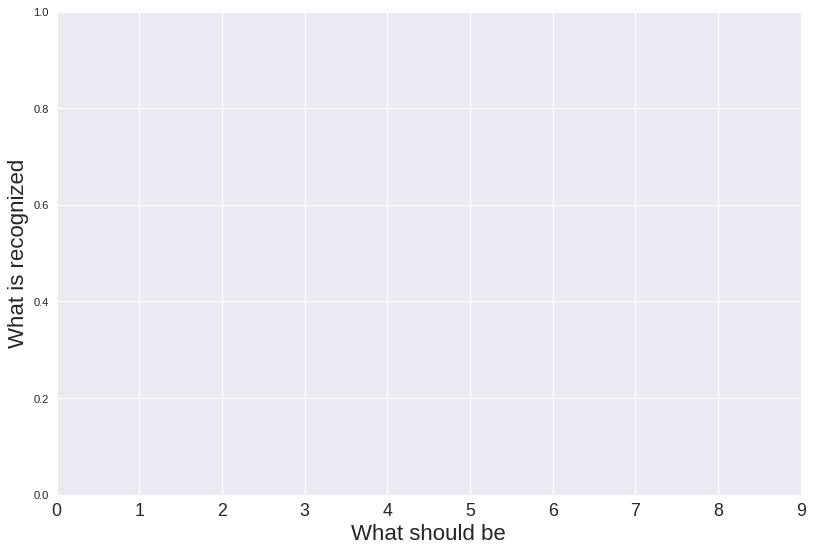

In [230]:
fig, ax = plt.subplots(figsize=(12, 8), dpi=80)
colors = [
"#B71427",
"#FFE658",
"#F3FAB6",
"#A8CD1B",
"#CBE32D",
"#005A31",
"#6DBDD6",
"#558C89",
"#74AFAD",
"#D9853B"
]
#np.random.shuffle(colors)
plt.xticks(np.arange(10), size=16)
plt.xlabel("What should be", size=20)
plt.ylabel("What is recognized", size=20)


wrong_numbers = [np.bincount(what_is_predicted(predictions, i)) for i in range(0, 10)]
result = []
for i, num in enumerate(wrong_numbers):
    bottom = 0
    for j, error in enumerate(num):
        if error:
            result.append(ax.bar(i, error, bottom=bottom, color=colors[j]))
            ax.text(i, bottom + error*0.5 - 0.1, j,
                    verticalalignment='center',
                    horizontalalignment='center',
                    size=16, weight='bold')
            bottom += error
